In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [2]:
ls

cy_grape_fid_error_timeslices_10.hdf5
cy_grape_fid_error_timeslices_2.hdf5
cy_grape_fid_error_timeslices_4.hdf5
cy_grape_fid_error_timeslices_8.hdf5
Fig_grape_crab_vs_pop.pdf
Fig_grape_vs_pop.pdf
plots.ipynb
pulseoptim_fid_error_timeslices_10.hdf5
pulseoptim_fid_error_timeslices_2.hdf5
pulseoptim_fid_error_timeslices_4.hdf5
pulseoptim_fid_error_timeslices_8.hdf5
Quantum_optimal_control_GRAPE_methods.ipynb
results.hdf5


In [3]:
# Load data

def load_data(fname):
    with h5py.File(fname, 'r') as f:
        assert len(f.values()) == 1
        for data in f.values():
            return data[...]
        
timeslices = [2, 4, 8, 10]
# timeslices = [10,]

cy_grape_fid_error = [
    load_data('cy_grape_fid_error_timeslices_{}.hdf5'.format(_)) for _ in timeslices
]    

pulseoptim_fid_error = [
    load_data('pulseoptim_fid_error_timeslices_{}.hdf5'.format(_)) for _ in timeslices
]    

with h5py.File('../results_PiecewiseConst.hdf5', 'r') as f:
    pop_fid_error = 1 - f['f_PSU'][...]

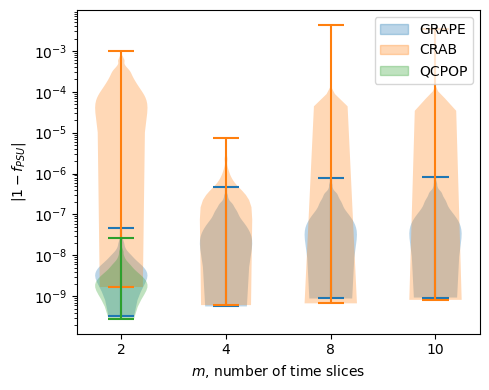

In [6]:
import matplotlib.patches as mpatches

plt.figure(figsize=(5, 4))

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

# GRAPE
add_label(plt.violinplot([np.abs(_)  for _ in cy_grape_fid_error]), "GRAPE")    

add_label(plt.violinplot([np.abs(_)  for _ in pulseoptim_fid_error]), "CRAB")

add_label(plt.violinplot(pop_fid_error), "QCPOP")

plt.yscale('log')

plt.xticks(range(1, len(timeslices) + 1), timeslices )
plt.xlabel("$m$, number of time slices")

plt.ylabel("$|1 - f_{PSU}|$")

plt.legend(*zip(*labels), loc=1)

plt.tight_layout()

plt.savefig("Fig_grape_crab_vs_pop.pdf")

plt.show()